In [1]:
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport
import scipy
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer


In [17]:
import sweetviz as sv

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
import pandas as pd
#collected seaons 2020 to 2023        
df_full= pd.read_csv('MSDS_422_FinalProject_Individual_Stats.csv')


In [11]:
#len(df.PLAYER_NAME.unique().tolist())

In [76]:
col_names = list(df_full.columns)
feature_col_names = list(df_full.columns)[9:]

In [58]:
#save the profile variables separately 
df_profiles = df_full[0:10]
#all the columns from 9 to the end
df_features = df_full.iloc[:,10:]

In [77]:
#impute nan values
imputer = sk.impute.SimpleImputer(strategy='mean')
df_features = imputer.fit_transform(df_features)

In [78]:
df_features = pd.DataFrame(df_features, columns=feature_col_names)

In [79]:
#creat an EFG Column
df_features['EFG'] = (df_features['FGM'] + 0.5*df_features['FG3M'])/df_features['FGA']

In [15]:
#add the target back in but we don't have our tarket get, will get it from subset modeling
#df = pd.concat([df_full.loc[:,'W'],df_features],axis=1)

In [80]:
splayer_eda = sv.analyze(df_features)

                                             |          | [  0%]   00:00 -> (? left)

FloatingPointError: invalid value encountered in subtract

In [39]:
splayer_eda.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [81]:
#drop features with higher than 0.6 correlation in more than one pair
corr=df_features.corr()
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
threshold = 0.6
to_drop = [column for column in upper.columns if sum(abs(upper[column])>threshold)>4]

In [82]:
feature_subset=df_features.drop(df_features[to_drop], axis=1)
feature_col_names = feature_subset.columns

In [83]:
#cast the features onto the same 0 to 1 scale
scalar = MinMaxScaler(feature_range=(0,1))
scaled_features = scalar.fit_transform(feature_subset)
scaled_features = pd.DataFrame(scaled_features, columns=feature_col_names)

In [70]:
from sklearn.decomposition import PCA

In [84]:
#do PCA
pca=sk.decomposition.PCA()
pca.fit(scaled_features)


PCA()

In [91]:
print(pca.explained_variance_ratio_*100)
p_explained = pca.explained_variance_ratio_*100
p_running = np.cumsum(p_explained)
print(p_running)

[4.46651912e+01 1.71917095e+01 9.07623307e+00 6.18302137e+00
 5.19631539e+00 3.35960485e+00 2.83660672e+00 2.13735246e+00
 1.49085621e+00 1.39011877e+00 1.13159135e+00 1.04507944e+00
 8.95602347e-01 6.96356106e-01 6.47516064e-01 4.74960889e-01
 3.48355285e-01 2.39035246e-01 2.05491223e-01 1.40500916e-01
 1.25055328e-01 1.18823895e-01 1.03458197e-01 6.77124924e-02
 5.95575067e-02 4.39673048e-02 3.31566672e-02 2.91633206e-02
 2.07408053e-02 1.44506340e-02 1.37301913e-02 1.07202507e-02
 7.76468712e-03 2.00221609e-04 3.59911356e-08 1.61711232e-09
 1.61689770e-09 2.13042582e-11 2.76613157e-31]
[ 44.66519121  61.85690076  70.93313382  77.11615519  82.31247058
  85.67207543  88.50868215  90.64603462  92.13689082  93.5270096
  94.65860095  95.70368038  96.59928273  97.29563883  97.9431549
  98.41811579  98.76647107  99.00550632  99.21099754  99.35149846
  99.47655379  99.59537768  99.69883588  99.76654837  99.82610588
  99.87007318  99.90322985  99.93239317  99.95313398  99.96758461
  99.98131

In [92]:
import matplotlib.pyplot as plt

In [121]:
# Get the feature contributions for each principal component
topXfeatures = 4
feature_contributions = pca.components_[:topXfeatures] 

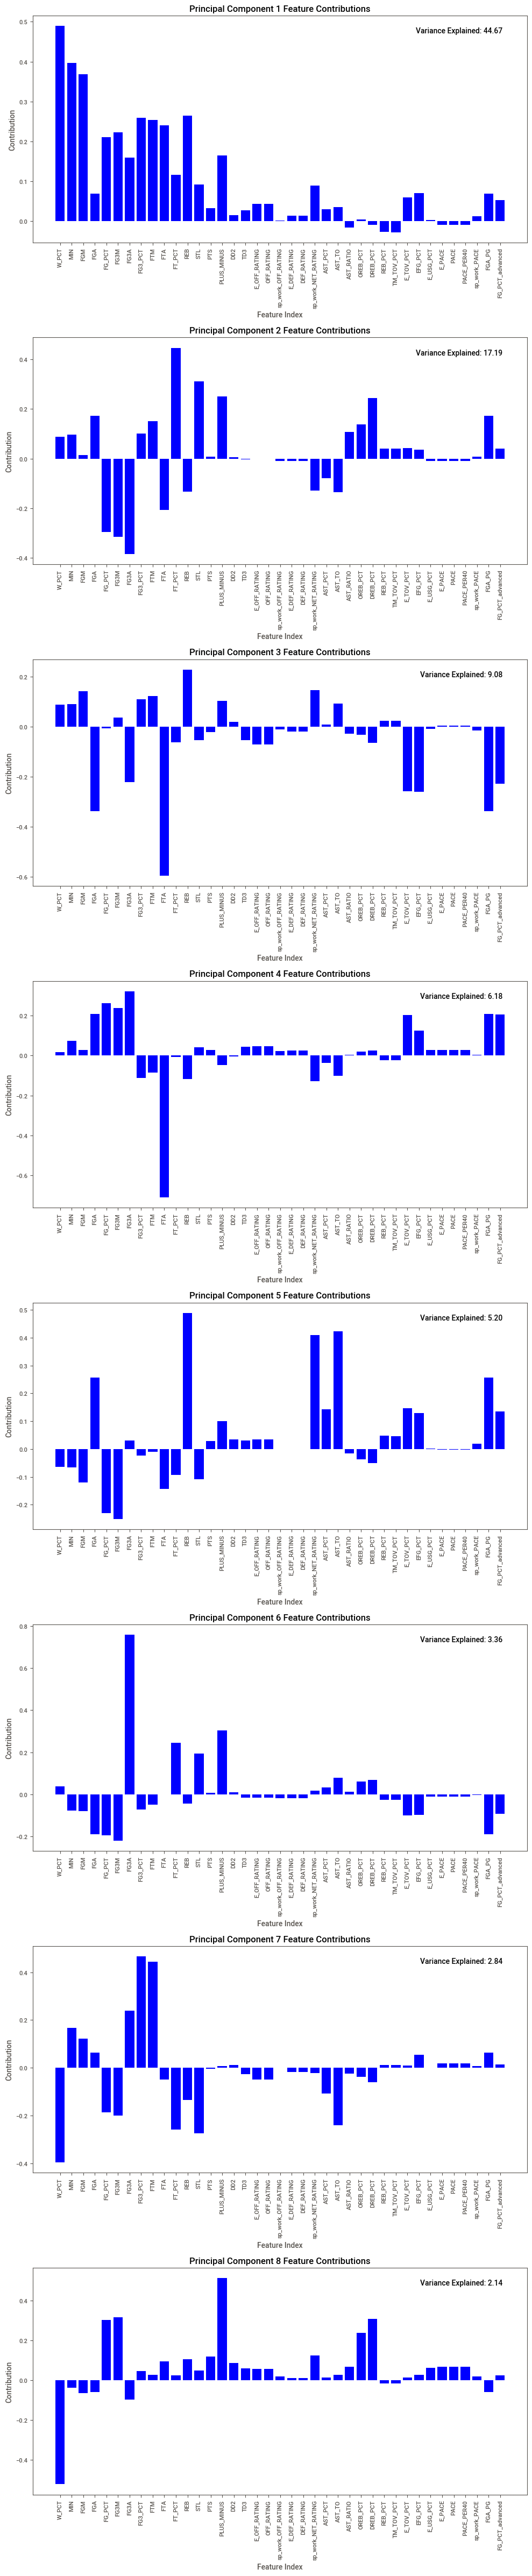

In [117]:
num_components = len(feature_contributions)
num_features = len(feature_col_names)
fig, axes = plt.subplots(num_components, 1, figsize=(10, 6*num_components))

for i in range(num_components):
    ax = axes[i]
    ax.bar(np.arange(num_features), feature_contributions[i], color='blue')
    ax.set_title(f"Principal Component {i+1} Feature Contributions")
    ax.set_xlabel("Feature Index")
    ax.set_ylabel("Contribution")
    ax.set_xticks(np.arange(num_features))
    ax.set_xticklabels(feature_col_names, rotation=90)
    
    ax.text(0.95, 0.95, f'Variance Explained: {p_explained[i]:.2f}',
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes, fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='none'))
    
    #plt.savefig(f"pc{i+1}_feature_contributions.jpg", bbox_inches='tight', dpi=300)
    #plt.close(fig)

plt.tight_layout()
plt.show()

In [150]:
num_components = len(feature_contributions)
num_features = len(feature_col_names)
fig_scale=1.2
fig, axs = plt.subplots(2, 2, figsize=(20*fig_scale, 12*fig_scale))
#fig, axes = plt.subplots(num_components, 1, figsize=(10, 6*num_components))

for i in range(num_components):
    #ax = axes[i]
    row = i // 2  
    col = i % 2
    axs[row, col].bar(np.arange(num_features), feature_contributions[i], color='blue')
    axs[row, col].set_title(f"Principal Component {i + 1} Feature Contributions")
    #axs[row, col].set_xlabel("Feature Index")
    axs[row, col].set_ylabel("Contribution")
    axs[row, col].set_xticks(np.arange(num_features))
    if i == 2 or i == 3:
        axs[row, col].xaxis.tick_top()
        axs[row, col].set_xticklabels(feature_col_names, rotation=90)
        axs[row, col].set_title(f" ", loc='center')

    axs[row, col].text(0.9, 0.9, f'Variance Explained: {p_explained[i]:.2f}',
                       verticalalignment='top', horizontalalignment='right',
                       transform=axs[row, col].transAxes, fontsize=10, color='black',
                       bbox=dict(facecolor='none', edgecolor='none'))
    


plt.savefig("top4_contributions.jpg", bbox_inches='tight', dpi=300)
plt.close(fig)

plt.show()

<Figure size 640x480 with 0 Axes>